# FY2024 Asset Report (EGMs by Region, Service)  Visualization

Mounted at /content/drive
Data shape before cleaning: (36, 10)
              Period  Region  Num_Locations  Army  Navy  Marine_Corps  \
0   EOM October 2023  Europe             35   580   161             0   
1   EOM October 2023   Japan             34    59   291           346   
2   EOM October 2023   Korea             16   381    23             0   
3   EOM October 2023   Total             85  1020   475             0   
4  EOM November 2023  Europe             35   568   163             0   

   Airforce  Total  Year  Month  
0         0    741  2023     10  
1         0    696  2023     10  
2         0    404  2023     10  
3         0   1841  2023     10  
4         0    731  2023     11  
✅ Rows after removing 'Total' region: 27


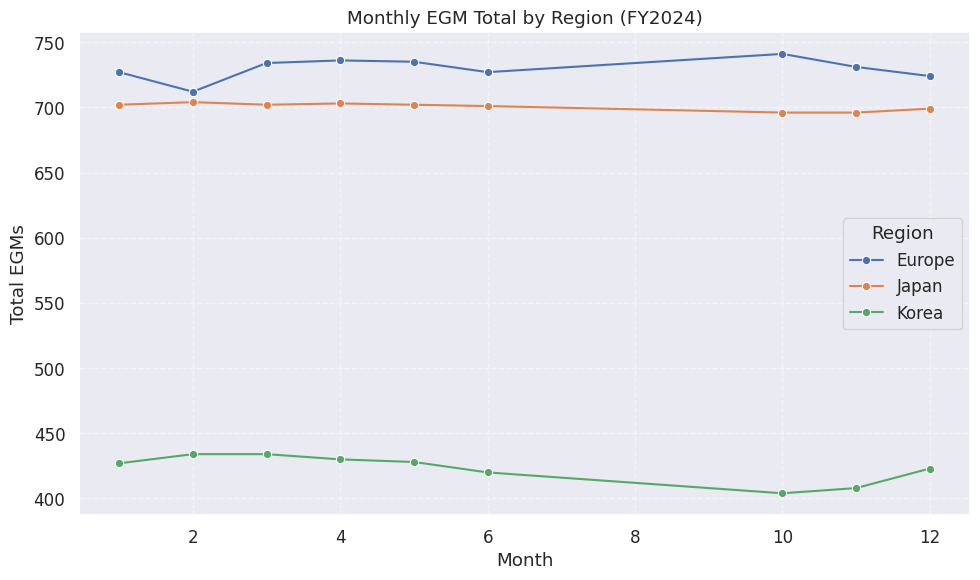

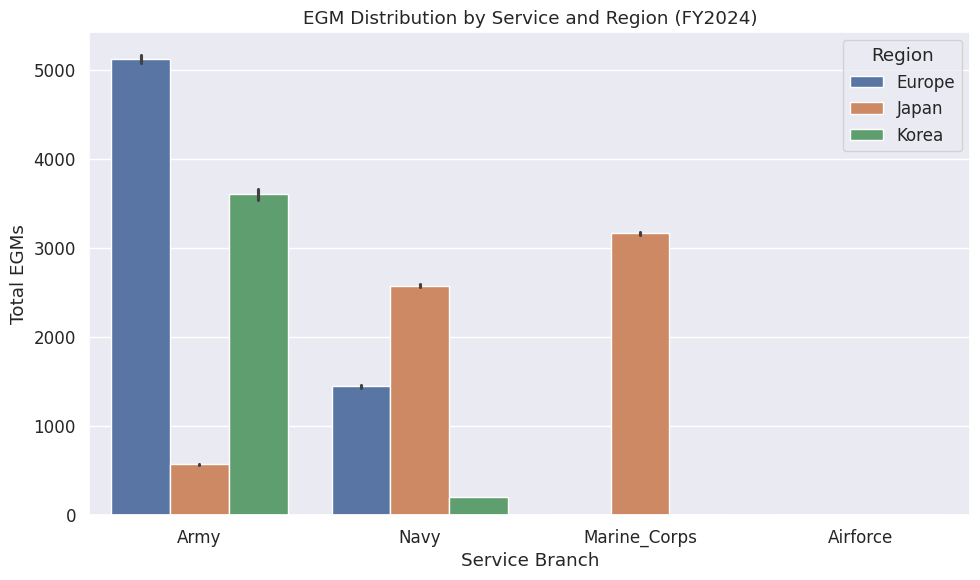

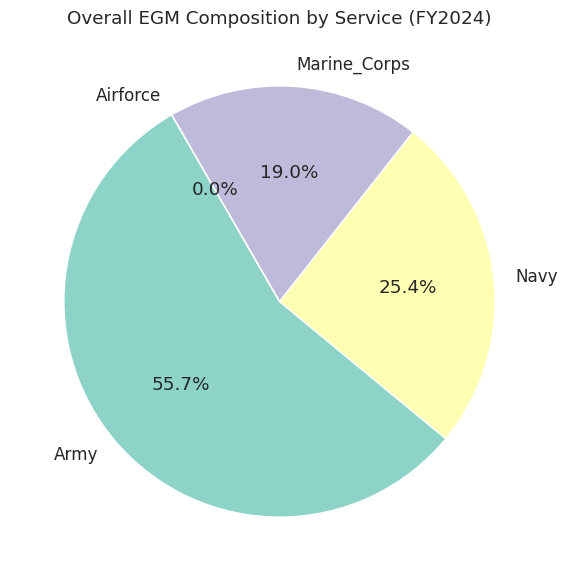

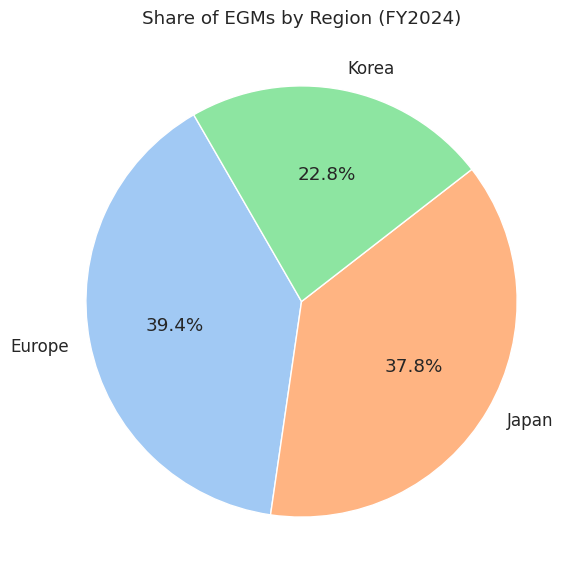


=== Summary by Region ===
        Army  Navy  Marine_Corps  Airforce  Total  % of Total
Region                                                       
Europe  5119  1448             0         0   6567       39.37
Japan    569  2575          3161         0   6305       37.80
Korea   3601   207             0         0   3808       22.83

✅ Export Complete: egms_summary_by_region_no_total.csv


In [1]:
# === Step 1. Mount Google Drive ===
from google.colab import drive
drive.mount('/content/drive')

# === Step 2. Import Required Libraries ===
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8-colorblind')
sns.set(font_scale=1.1)
%matplotlib inline

# === Step 3. Load the Dataset ===
# ⚠️ Update the path below to match your actual file location in Google Drive
file_path = '/content/drive/MyDrive/DS701/egms_by_region_service_2024.csv'
df = pd.read_csv(file_path)

# === Step 4. Inspect Columns and Data ===
print("Data shape before cleaning:", df.shape)
print(df.head())

# === Step 5. Basic Data Cleaning ===
# Ensure consistent column formatting
df.columns = df.columns.str.strip()
df = df.dropna(subset=['Region', 'Month', 'Year'])
df['Month'] = df['Month'].astype(int)
df['Year'] = df['Year'].astype(int)

# === Step 5.5. Remove 'Total' rows from Region ===
df = df[df['Region'].str.strip().str.lower() != 'total']
print(f"✅ Rows after removing 'Total' region: {len(df)}")

# Sort by Year, Month, and Region for chronological order
df = df.sort_values(['Year', 'Month', 'Region'])

# === Step 6. Chart 1: Monthly Total EGM Trend by Region ===
plt.figure(figsize=(10,6))
sns.lineplot(data=df, x='Month', y='Total', hue='Region', marker='o')
plt.title('Monthly EGM Total by Region (FY2024)')
plt.xlabel('Month')
plt.ylabel('Total EGMs')
plt.legend(title='Region')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# === Step 7. Chart 2: EGM Distribution by Service (Army, Navy, Marine Corps, Airforce) ===
melted = df.melt(
    id_vars=['Region', 'Month', 'Year'],
    value_vars=['Army', 'Navy', 'Marine_Corps', 'Airforce'],
    var_name='Service', value_name='Count'
)

plt.figure(figsize=(10,6))
sns.barplot(data=melted, x='Service', y='Count', hue='Region', estimator=sum)
plt.title('EGM Distribution by Service and Region (FY2024)')
plt.xlabel('Service Branch')
plt.ylabel('Total EGMs')
plt.legend(title='Region')
plt.tight_layout()
plt.show()


# === Step 9. Chart 4: EGM Composition by Service (Pie Chart) ===
service_sum = df[['Army','Navy','Marine_Corps','Airforce']].sum()
plt.figure(figsize=(7,7))
plt.pie(service_sum, labels=service_sum.index, autopct='%1.1f%%', startangle=120, colors=sns.color_palette('Set3'))
plt.title('Overall EGM Composition by Service (FY2024)')
plt.show()

# === Step 10. Chart 5: Regional Contribution to Total EGMs (Pie Chart) ===
region_total = df.groupby('Region')['Total'].sum().sort_values(ascending=False)
plt.figure(figsize=(7,7))
plt.pie(region_total, labels=region_total.index, autopct='%1.1f%%', startangle=120, colors=sns.color_palette('pastel'))
plt.title('Share of EGMs by Region (FY2024)')
plt.show()

# === Step 11. Export Summary (Optional) ===
summary = df.groupby('Region')[['Army','Navy','Marine_Corps','Airforce','Total']].sum()
summary['% of Total'] = (summary['Total'] / summary['Total'].sum() * 100).round(2)
print("\n=== Summary by Region ===")
print(summary)
summary.to_csv('/content/drive/MyDrive/egms_summary_by_region_no_total.csv', encoding='utf-8-sig')
print("\n✅ Export Complete: egms_summary_by_region_no_total.csv")


# Conclusions

My Contribution to the EDA

I contributed to the exploratory data analysis by extracting and structuring the “EGMs by Region, Service” table from the FY2024 Asset Report. I used Python-based PDF parsing techniques to isolate this specific section, clean the text data, and convert it into a structured CSV file for analysis. Afterward, I ensured that summary rows labeled “Total” were removed from the Region column to prevent double-counting. Once the dataset was finalized, I generated several visualizations to analyze trends across regions and service branches.

Key Insight

One key insight from the EDA is that Europe holds the largest share of EGMs (39.4%), followed closely by Japan (37.8%), while Korea (22.8%) has the smallest proportion. Across service branches, Army accounts for over half of all EGMs (55.7%), with Navy (25.4%) and Marine Corps (19.0%) trailing behind, and Airforce showing no recorded EGMs.
This suggests that the Army remains the dominant operator of EGMs globally, while Europe continues to serve as the central hub for EGM operations throughout FY2024.